<a href="https://colab.research.google.com/github/grecoserafim/cars_machine_learning/blob/main/cars_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.drop('car_ID', axis=1, inplace=True)

display(df)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Estudo do Dataset

Inicialmente ja observa-se que a coluna Carname está com a marca e o nome do modelo do carro, vamos adicionar mais uma coluna para melhorar a organização

In [3]:
df['Brand'] = ''
df['Model_car'] = ''

# separar a coluna "CarName" em duas colunas
df[['Brand', 'Model_car']] = df['CarName'].str.split(' ', n=1, expand=True)



In [5]:
df.drop('CarName', axis=1, inplace=True)

df = df[['Brand', 'Model_car'] + [col for col in df.columns if col not in ['Brand', 'Model_car']]]

In [6]:
brand = df["Brand"].unique()
brand_size = len(brand)

print("Lista de marcas: ", brand)
print("Número total de marcas: ", brand_size)

Lista de marcas:  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
Número total de marcas:  28


Foi notado algumas marcas se repetindo, vamos corrigir isso

In [7]:
df['Brand'] = df['Brand'].replace(['nissan', 'Nissan'], 'nissan')
df['Brand'] = df['Brand'].replace(['porsche', 'porcshce'], 'porsche')
df['Brand'] = df['Brand'].replace(['toyota', 'toyouta'], 'toyota')
df['Brand'] = df['Brand'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

brand = df["Brand"].unique()
brand_size = len(brand)

print("Lista de marcas: ", brand)
print("Número total de marcas: ", brand_size)

Lista de marcas:  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Número total de marcas:  23


Análise de Colunas em relação ao Preço

# Analisando Dataset

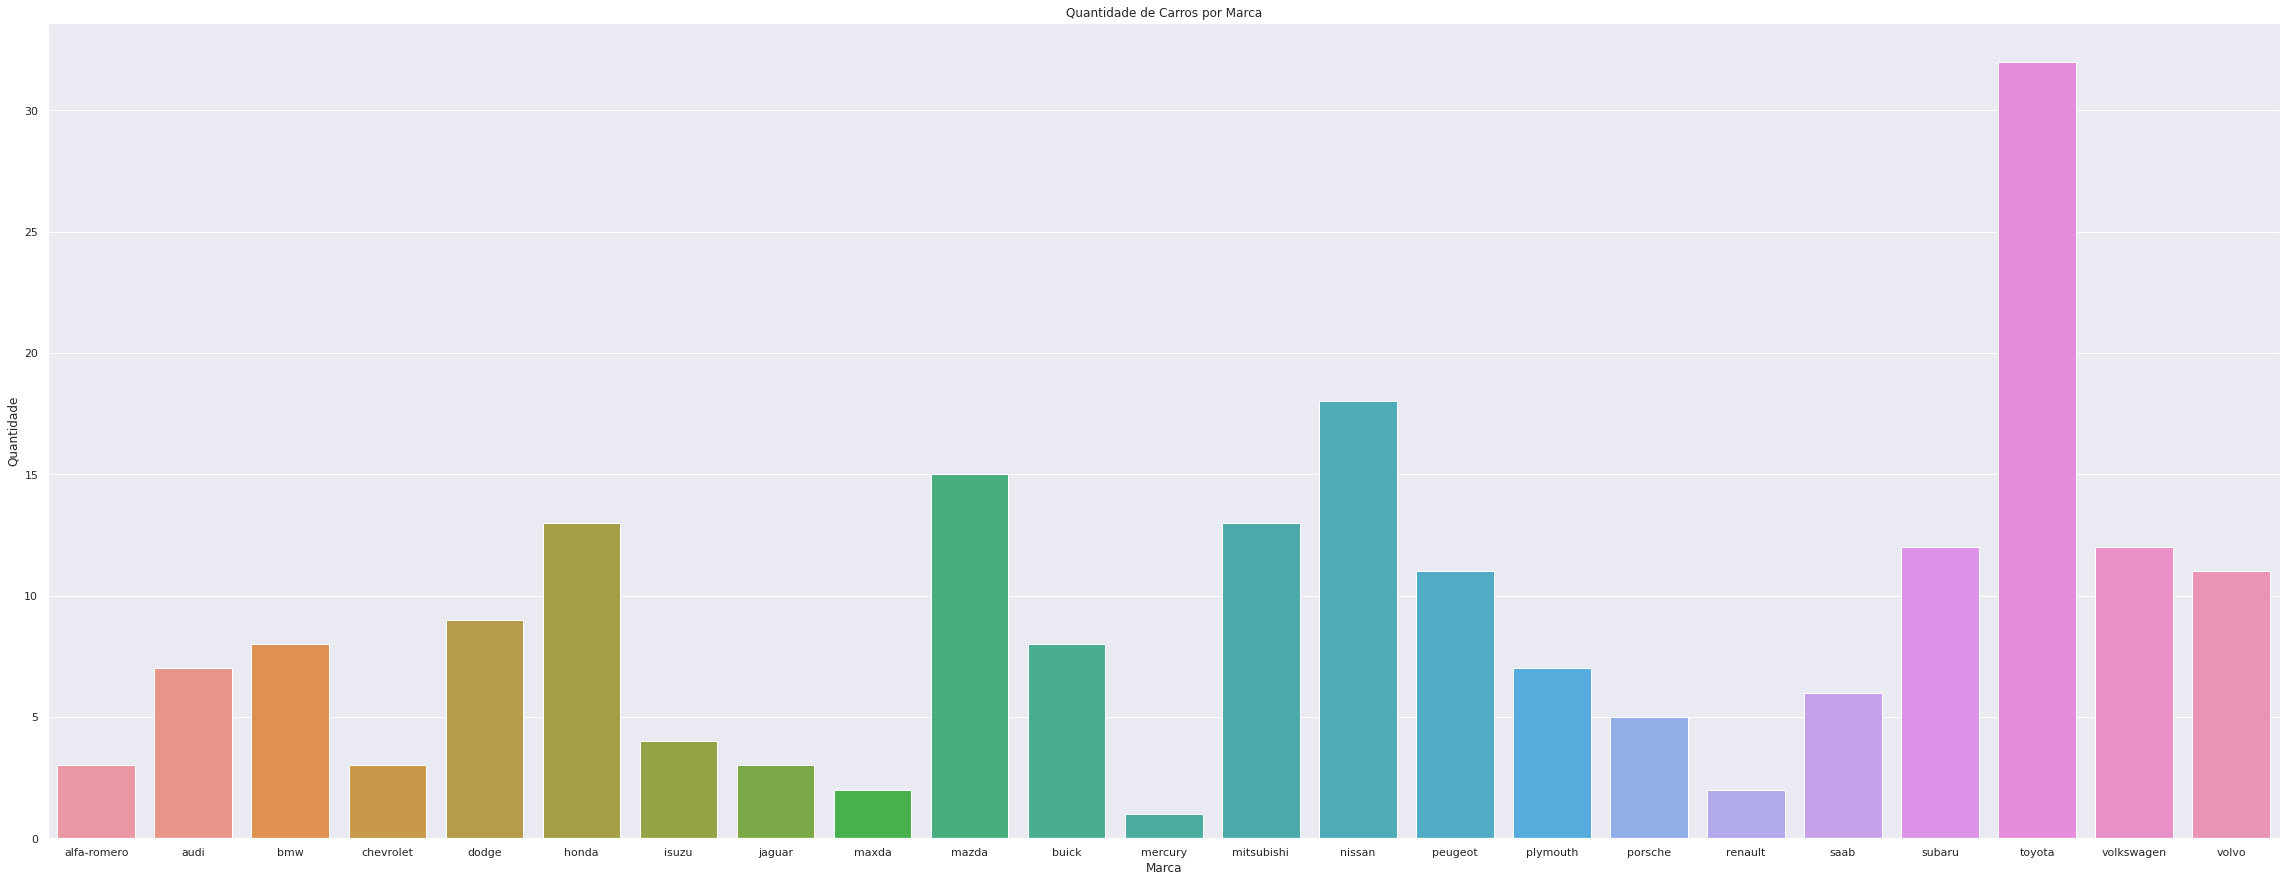

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(40, 15))
sns.countplot(x='Brand', data=df)
plt.title('Quantidade de Carros por Marca')
plt.xlabel('Marca')
plt.ylabel('Quantidade')
plt.show()

Toyota é a marca que mais aparece no dataset

In [9]:
# Selecionar as colunas categóricas
cat_cols = df.select_dtypes(include='object').columns.tolist()
exclude =['Brand', 'Model_car', 'cylindernumber']


cat_cols_filtered = list(filter(lambda x: x not in exclude, cat_cols))
print(cat_cols_filtered)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']


# Visualizando as variavéis Categóricas




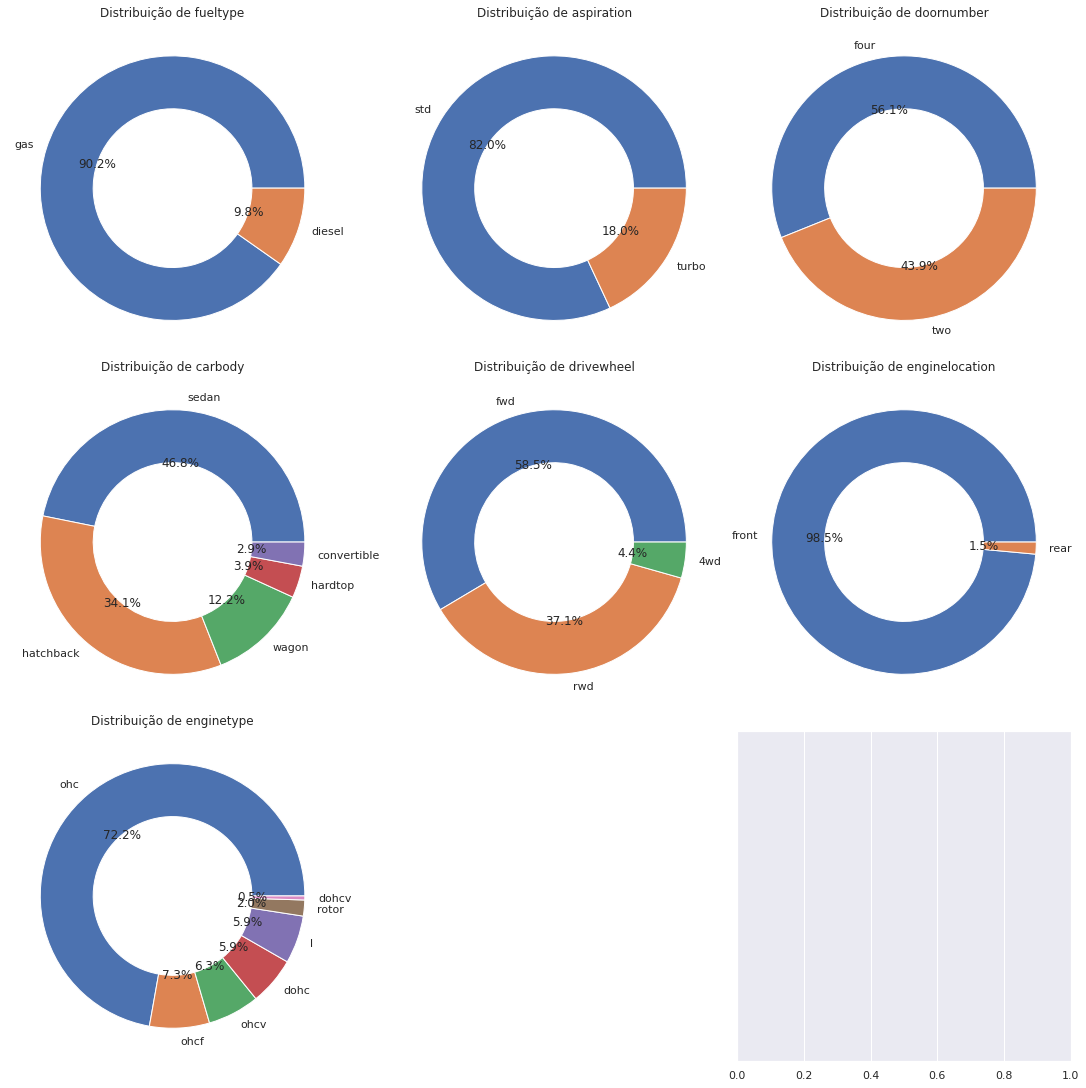

In [10]:


# Configurar o tamanho dos gráficos e a largura da linha entre eles
fig_width = 15
fig_height = 5
hspace = 0.4

# Criar a grade de gráficos
nrows = (len(cat_cols_filtered) + 2) // 3
fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(fig_width, nrows * fig_height), constrained_layout=True, sharey=True)
axs = axs.flatten()

# Criar um gráfico de pizza para cada coluna categórica
for i, col in enumerate(cat_cols_filtered):
    col_counts = df[col].value_counts()
    axs[i].pie(col_counts, labels=col_counts.index, autopct="%1.1f%%", wedgeprops={'width': 0.4})
    axs[i].set_title(f"Distribuição de {col}")
    
# Esconder os gráficos que sobraram na última linha (se houver)
if len(cat_cols_filtered) % 3 != 0:
    for i in range(len(cat_cols_filtered) % 3, 3):
        fig.delaxes(axs[-i])

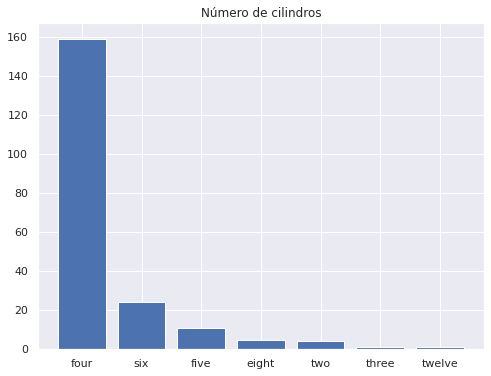

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(df['cylindernumber'].value_counts().index, df['cylindernumber'].value_counts().values)

# adicionando um título ao gráfico
ax.set_title('Número de cilindros')

# exibindo o gráfico
plt.show()

O Cilindros foi feito em Gráfico de barras, para obter uma melhor visualização

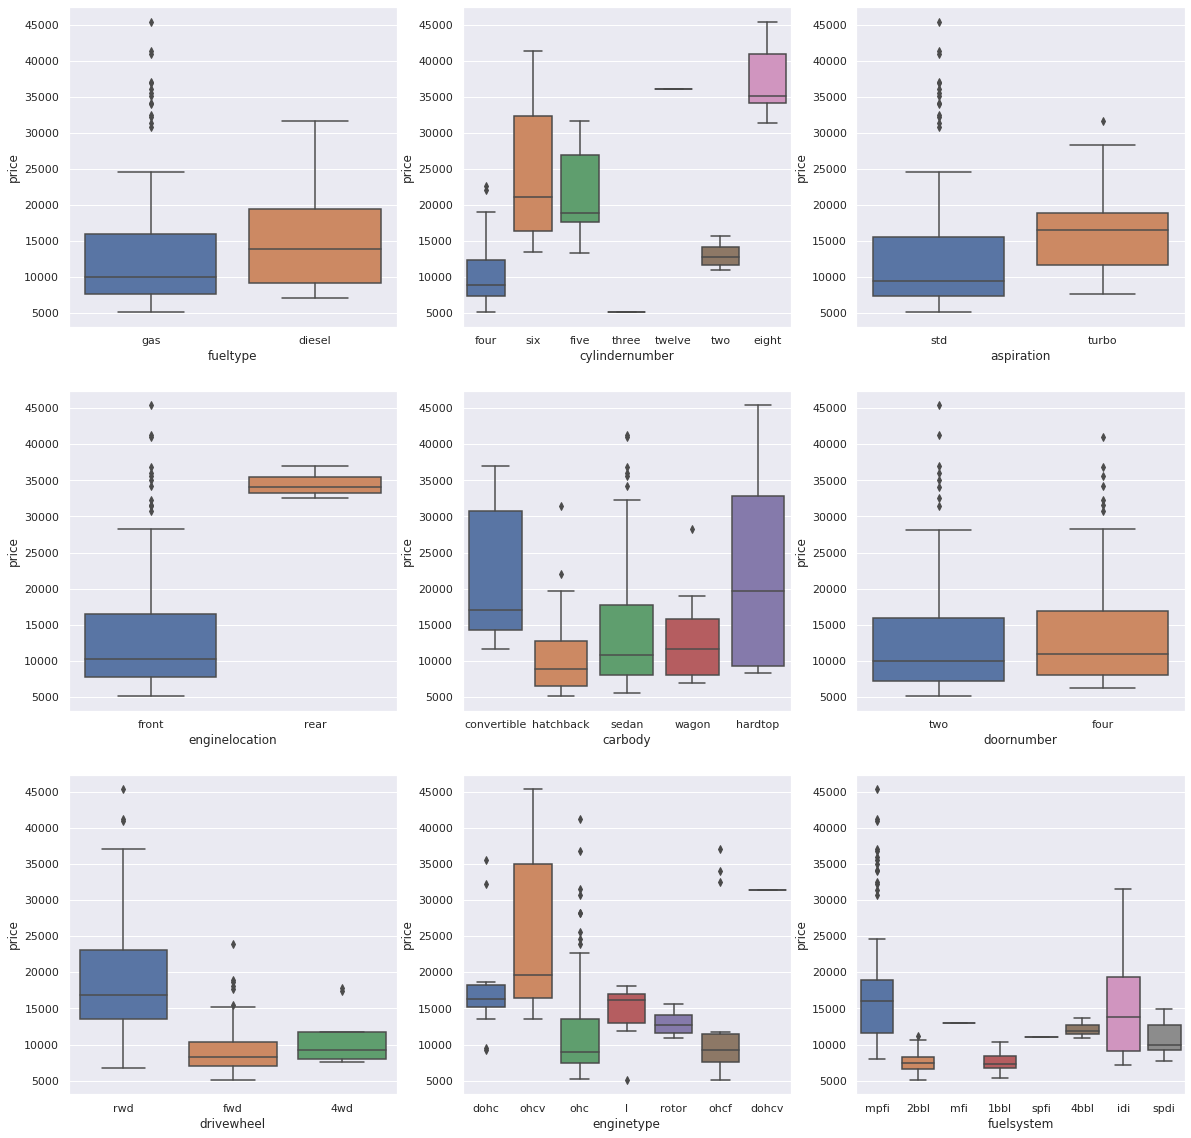

In [18]:
plt.figure(figsize=(20, 20))
columns=['fueltype','cylindernumber','aspiration','enginelocation','carbody','doornumber','drivewheel','enginetype','fuelsystem']
i=0
for i, col in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, y='price', data=df)
plt.show()

Observações: 
Número de portas nao afeta tanto o preço
Carros a diesel tendem a ser mais caros que a gasolina
Carros com motor traseiro, tendem ser muito mais caros com motor frontal
Quanto maior o numero de Cilindros , mais caro o carro tende a ser.
O tipo de motor ohcv é o que possui maior variação de preço e com valores mais elevados.
Carros com força motriz nas rodas dianteiras tendem a ser mais caros.

# Visualizando as variavéis Numéricas

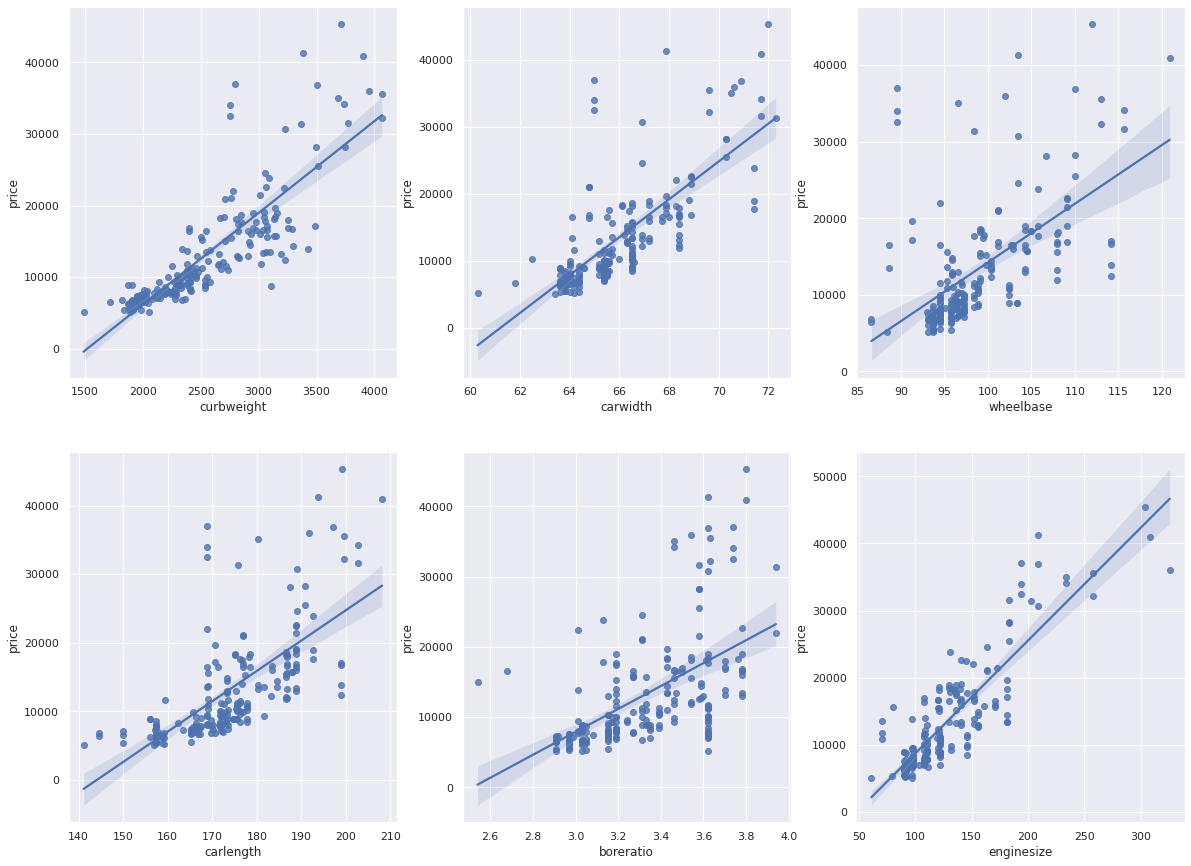

In [25]:
columns=['curbweight','carwidth','wheelbase','carlength','boreratio','enginesize']
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    sns.regplot(x = col, y = 'price', data = df)
plt.show()

Quanto maior a largura do carro, os valores tendem a aumentar
Quanto mais pesado o veiculo, o preço tende a ser maior
As distancias entre os eixos tem vários outliers e mesmo carros com esse mesmo valor, variam muito os preços
A variação do tamanho dp  motor tende variar com o preço.
Geralmente quanto maior o carro, maior sao os preços.